In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 

from sklearn.datasets import make_circles

CREAR EL DATASET

In [2]:
n = 500 #numero de registros

p = 2 #caracteristicas en cada registro

#por ejemplo 500 personas y 2 caracteristicas pelo y altura

<function matplotlib.pyplot.show(close=None, block=None)>

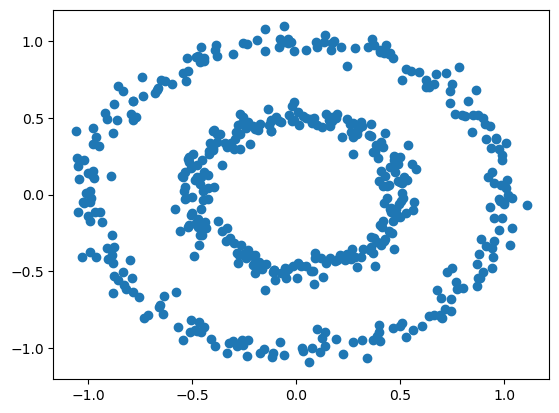

In [3]:
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[:,0],X[:,1])
plt.show

# se creó un dataset de datos en forma de circulos, factor es la distancia entre circulos y agrego ruido a los datos con noise o sea variabilidad entre los puntos para hacerlo mas realista

(-1.165817957264031,
 1.2176687048581265,
 -1.2025848089233389,
 1.2044470643158374)

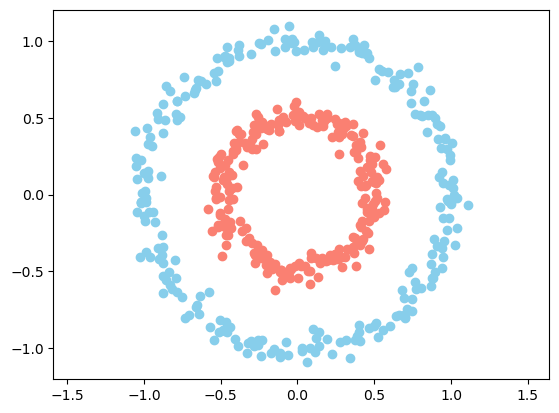

In [4]:
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")

# comenzamos a crear la red nueronal

In [5]:
# CLASE DE LA CAPA DE LA RED
class neural_layer():

    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f

        self.b = np.random.rand(1,n_neur) * 2 - 1
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1
#

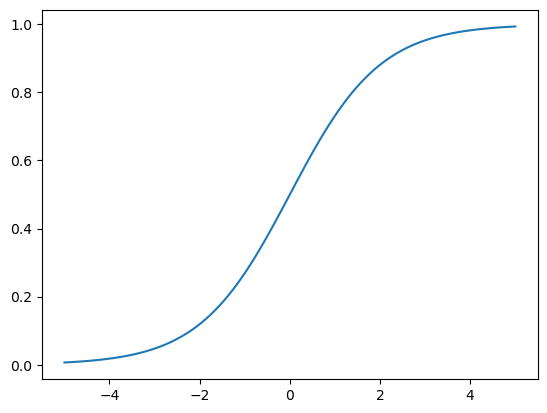

In [6]:
# FUNCIONES DE ACTIVACION

sigm = (lambda x: 1 / (1 + np.e ** (-x)), 
        lambda x: x * (1-x))

relu = lambda x: np.maximum(0, x)




_x = np.linspace(-5, 5, 100)

plt.plot(_x,sigm[0](_x))


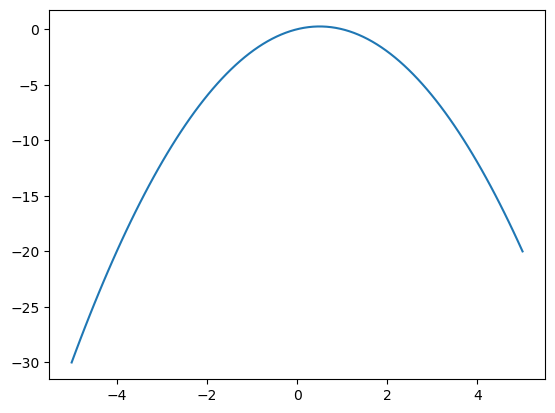

In [7]:
plt.plot(_x,sigm[1](_x))

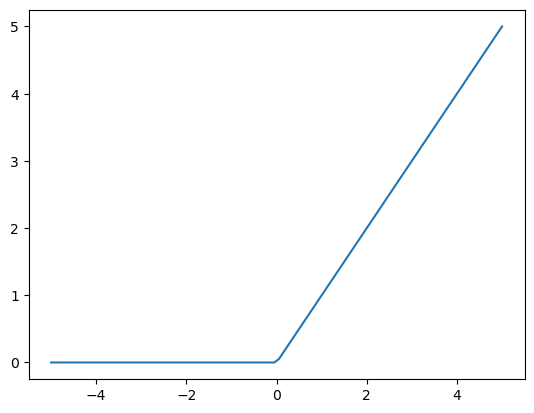

In [8]:
relu = lambda x: np.maximum(0, x)
plt.plot(_x, relu(_x))

# funciones de activacion

# hemos crado nuestra clase que nos permite crear capas

In [9]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8 , sigm)
# ...
#estamos creando capas , haber creado la clase neural_layer nos invita a hacer de forma interativa el codigo


def create_nn(topology, act_f):

    nn = []

    for l, layer in enumerate(topology[:-1]):

        nn.append(neural_layer(topology[l], topology[l+1], act_f))

    return nn
topology = [p, 4, 8, 16 ,8, 4, 1] #la ultima capa es una sola capa de salida, es un vector y el numero ha sido elegido de forma arbitraria

create_nn(topology, sigm)



In [10]:
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr) ** 2),
            lambda Yp, Yr: (Yp-Yr)) #funcion costo

def train(neural_net, X, Y, l2_cost, lr=0., train=True):

    out = [(None, X)]# None me permite ser reemplazado

    # Forward Pass

    for l, layer in enumerate(neural_net): #layer no esta siendo usada
         
         z = out[-1][1] @ layer.W + layer.b #suma ponderada de la primera capa
         
         a = layer.act_f[0](z) #funcion de activacion
         
         out.append((z, a))
    
    print(l2_cost[0](out[-1][1], Y))

    if train:## hace referencia ala variable trein = True
         
         #Backward pass
         deltas = []

         for l in reversed(range(0, len(neural_net))):

          z = out[l+1][0]
          a = out[l+1][1] ## lo que salio de la neurona

          print(a.shape)

          if l == len(neural_net) - 1:
              
              deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))#en el elemtno 0 incert

          else:
              deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

          _W =  neural_net[l].W
          #Gradient descent
          neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr #accedo al valor b de cada capa
          neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr#learning step
          #voy variando el valor de los parametors de b y   W hasta encontrar el minimo de l2_cost
    return out[-1][1]

In [11]:

train(neural_net, X, Y, l2_cost, 0.5)    

0.25325538685729704
(500, 1)
(500, 8)
(500, 4)


array([[0.56202122],
       [0.56093873],
       [0.54677416],
       [0.55134647],
       [0.55706515],
       [0.55398667],
       [0.55601284],
       [0.55547696],
       [0.55837251],
       [0.55203134],
       [0.55155579],
       [0.56230644],
       [0.55410069],
       [0.56225175],
       [0.55779437],
       [0.56223335],
       [0.55792839],
       [0.55716152],
       [0.5537389 ],
       [0.5470251 ],
       [0.55579584],
       [0.5501758 ],
       [0.55021747],
       [0.54571676],
       [0.54689425],
       [0.54799837],
       [0.55326702],
       [0.54977296],
       [0.56115088],
       [0.54901162],
       [0.55223259],
       [0.56185505],
       [0.55522229],
       [0.55815567],
       [0.55826756],
       [0.55413549],
       [0.54629774],
       [0.55159173],
       [0.55881975],
       [0.55874815],
       [0.56202713],
       [0.55610815],
       [0.55150511],
       [0.54625835],
       [0.55959719],
       [0.55792818],
       [0.55628968],
       [0.549

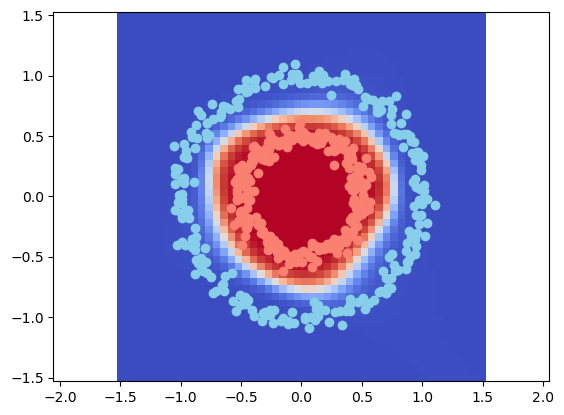

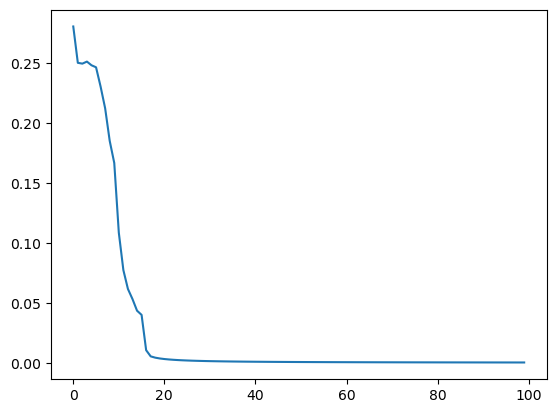

0.00027017342114912655
(500, 1)
(500, 8)
(500, 4)
0.0002700410396323535
(500, 1)
(500, 8)
(500, 4)
0.0002699087820525211
(500, 1)
(500, 8)
(500, 4)
0.0002697766482379501
(500, 1)
(500, 8)
(500, 4)
0.00026964463801727615
(500, 1)
(500, 8)
(500, 4)
0.0002695127512194491
(500, 1)
(500, 8)
(500, 4)
0.0002693809876737316
(500, 1)
(500, 8)
(500, 4)
0.00026924934720969984
(500, 1)
(500, 8)
(500, 4)
0.0002691178296572439
(500, 1)
(500, 8)
(500, 4)
0.00026898643484656276
(500, 1)
(500, 8)
(500, 4)
0.0002688551626081682
(500, 1)
(500, 8)
(500, 4)
0.00026872401277288114
(500, 1)
(500, 8)
(500, 4)
0.00026859298517183187
(500, 1)
(500, 8)
(500, 4)
0.00026846207963646
(500, 1)
(500, 8)
(500, 4)
0.0002683312959985125
(500, 1)
(500, 8)
(500, 4)
0.0002682006340900445
(500, 1)
(500, 8)
(500, 4)
0.0002680700937434167
(500, 1)
(500, 8)
(500, 4)
0.0002679396747912962
(500, 1)
(500, 8)
(500, 4)
0.00026780937706665474
(500, 1)
(500, 8)
(500, 4)
0.0002676792004027708
(500, 1)
(500, 8)
(500, 4)
0.0002675491446

In [12]:
import time
from IPython.display import clear_output
##agregar una salida de convergencia
neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500): #iteraciones

    #entrenamos a la red
    pY = train(neural_n, X, Y, l2_cost, lr=0.05)

    if i % 25 == 0:

        loss.append(l2_cost[0](pY, Y))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        print(_x0)
        print(_x1)
        print(_Y)

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)